# FIT5149 S1 2020 Assessment 1: Bushfire Analysis using Meteorological Data


Student information
- Family Name: Patil
- Given Name: Kshitij
- Student ID: 29519136
- Student email: kpat0012@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- xxxx
- xxxx
- xxxx 

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

In [1]:
#install.packages('cowplot')
#install.packages('glmnet')
#install.packages('tidyverse')
#install.packages('cowplot')
#install.packages('glmnet')
#install.packages('Hmisc')
#install.packages('corrplot')
#install.packages('ggplot2')
#install.packages('caret')
#install.packages('tensorflow')
#install.packages('e1071') #NEED TO USE THIS PACKAGE FOR MEASURE OF SKEWNEES
#install.packages('psych')
#install.packages('car')
#install.packages('leaps')
install.packages('ranger')


The downloaded binary packages are in
	/var/folders/wz/m_nhftd56w9clc2tlm12rxsr0000gn/T//RtmpVrfbl5/downloaded_packages


In [32]:
c
if(!require('Hmisc')){
    install.packages('Hmisc')
}
if(!require('ggplot2')){
    install.packages('ggplot2')
}

function (...)  .Primitive("c")

In [33]:
forestfires_Data <- read.csv('forestfires.csv')

In [34]:
dim(forestfires_Data)

[1] 517  13

In [35]:
#Lets have a look how does the data look
head(forestfires_Data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [36]:
str(forestfires_Data)
#TODO: need to change some of the columns into factors {X,Y} and then again do summary

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: chr  "mar" "oct" "oct" "mar" ...
 $ day  : chr  "fri" "tue" "sat" "fri" ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


In [37]:
#X and Y are cordinates therefore needs to be changed into factors
forestfires_Data$month <- as.factor(forestfires_Data$month)
forestfires_Data$day <- as.factor(forestfires_Data$day)
str(forestfires_Data)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: Factor w/ 12 levels "apr","aug","dec",..: 8 11 11 8 8 2 2 2 12 12 ...
 $ day  : Factor w/ 7 levels "fri","mon","sat",..: 1 6 3 1 4 4 2 2 6 3 ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


In [38]:
summary(forestfires_Data)

       X               Y           month      day          FFMC      
 Min.   :1.000   Min.   :2.0   aug    :184   fri:85   Min.   :18.70  
 1st Qu.:3.000   1st Qu.:4.0   sep    :172   mon:74   1st Qu.:90.20  
 Median :4.000   Median :4.0   mar    : 54   sat:84   Median :91.60  
 Mean   :4.669   Mean   :4.3   jul    : 32   sun:95   Mean   :90.64  
 3rd Qu.:7.000   3rd Qu.:5.0   feb    : 20   thu:61   3rd Qu.:92.90  
 Max.   :9.000   Max.   :9.0   jun    : 17   tue:64   Max.   :96.20  
                               (Other): 38   wed:54                  
      DMC              DC             ISI              temp      
 Min.   :  1.1   Min.   :  7.9   Min.   : 0.000   Min.   : 2.20  
 1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500   1st Qu.:15.50  
 Median :108.3   Median :664.2   Median : 8.400   Median :19.30  
 Mean   :110.9   Mean   :547.9   Mean   : 9.022   Mean   :18.89  
 3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800   3rd Qu.:22.80  
 Max.   :291.3   Max.   :860.6   Max.   :56.

In [39]:
colSums(is.na(forestfires_Data))

X     Y month   day  FFMC   DMC    DC   ISI  temp    RH  wind  rain  area 
    0     0     0     0     0     0     0     0     0     0     0     0     0

In [40]:
describe(forestfires_Data)

forestfires_Data 

 13  Variables      517  Observations
--------------------------------------------------------------------------------
X 
       n  missing distinct     Info     Mean      Gmd 
     517        0        9    0.982    4.669    2.648 

lowest : 1 2 3 4 5, highest: 5 6 7 8 9
                                                                
Value          1     2     3     4     5     6     7     8     9
Frequency     48    73    55    91    30    86    60    61    13
Proportion 0.093 0.141 0.106 0.176 0.058 0.166 0.116 0.118 0.025
--------------------------------------------------------------------------------
Y 
       n  missing distinct     Info     Mean      Gmd 
     517        0        7     0.92      4.3    1.309 

lowest : 2 3 4 5 6, highest: 4 5 6 8 9
                                                    
Value          2     3     4     5     6     8     9
Frequency     44    64   203   125    74     1     6
Proportion 0.085 0.124 0.393 0.242 0.143 0.002 0.012
---

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In [41]:
sub_data <- forestfires_Data  %>% select(-c(month,day,X,Y))
head(sub_data)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


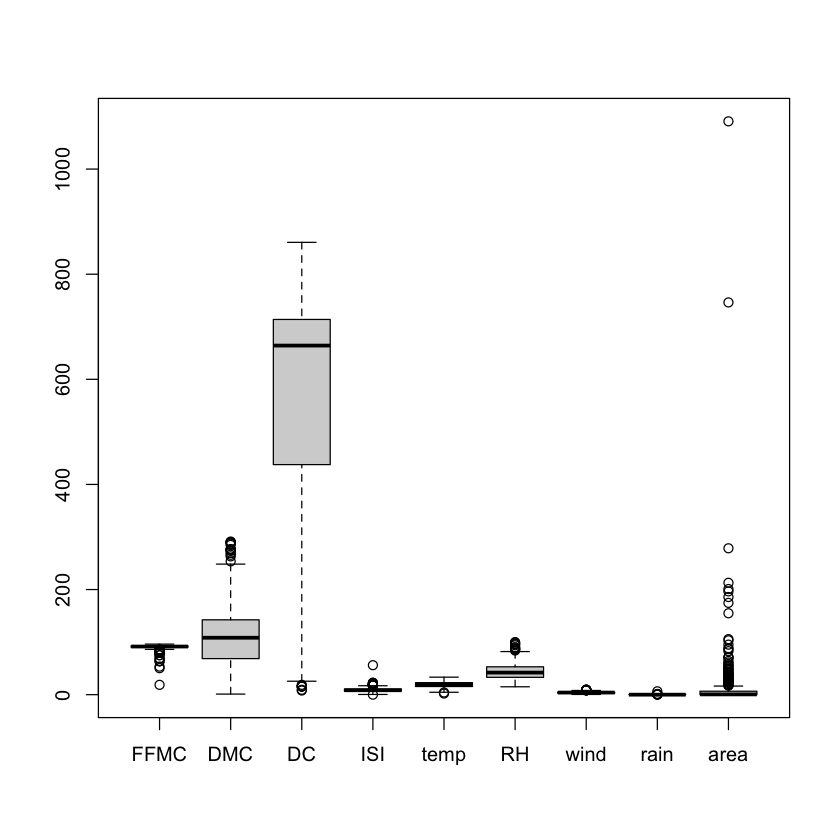

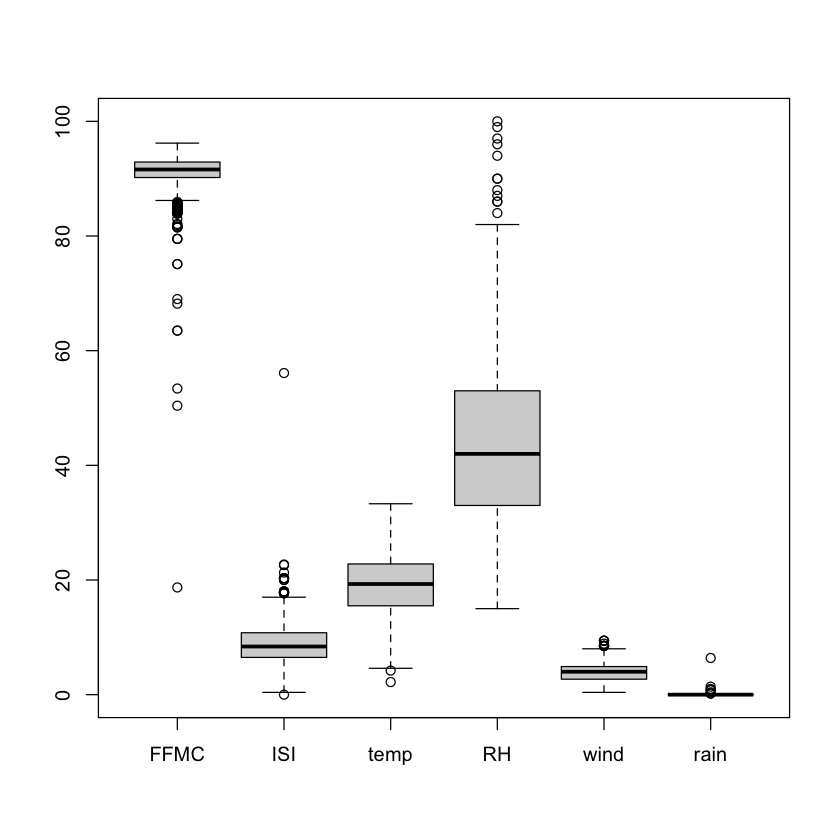

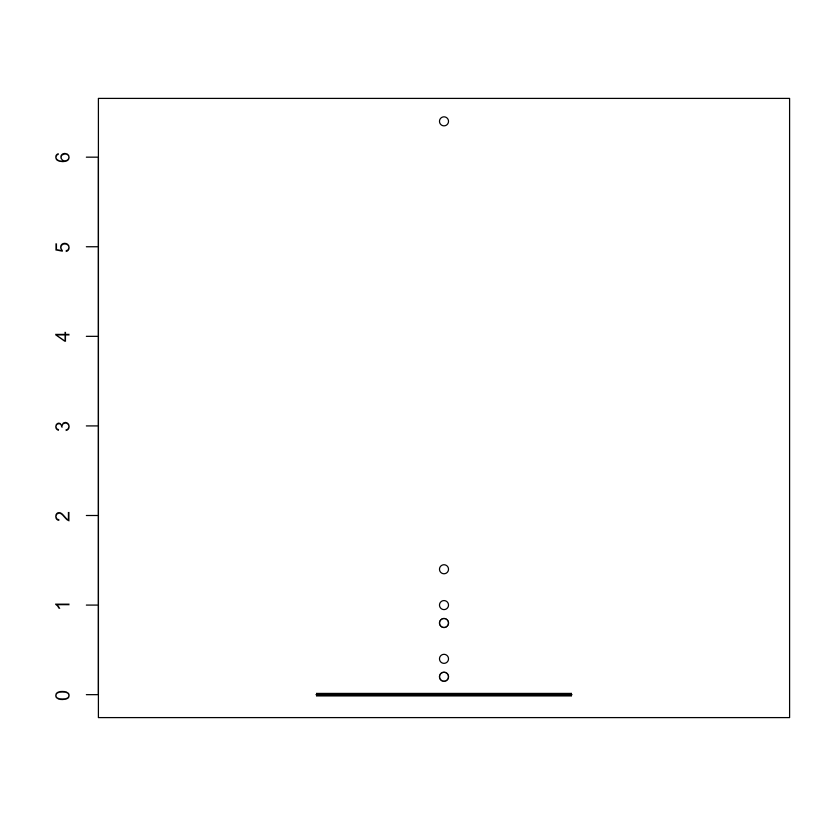

In [42]:
boxplot(sub_data) # The distribution of dc and DMC causing other variables not to show up well

boxplot(select(sub_data, -c(DC,DMC,area))) #Now we can view the distribution in a much better manner

boxplot(select(sub_data,c(rain)))

In [43]:
correlation2 <- cor(sub_data)

In [44]:
correlation2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.00000000,0.38261880,0.33051180,0.531804931,0.43153226,-0.30099542,-0.02848481,0.056701533,0.040122004
DMC,0.38261880,1.00000000,0.68219161,0.305127835,0.46959384,0.07379494,-0.10534225,0.074789982,0.072994296
DC,0.33051180,0.68219161,1.00000000,0.229154169,0.49620805,-0.03919165,-0.20346569,0.035860862,0.049383225
ISI,0.53180493,0.30512783,0.22915417,1.000000000,0.39428710,-0.13251718,0.10682589,0.067668190,0.008257688
temp,0.43153226,0.46959384,0.49620805,0.394287104,1.00000000,-0.52739034,-0.22711622,0.069490547,0.097844107
RH,-0.30099542,0.07379494,-0.03919165,-0.132517177,-0.52739034,1.00000000,0.06941007,0.099751223,-0.075518563
wind,-0.02848481,-0.10534225,-0.20346569,0.106825888,-0.22711622,0.06941007,1.00000000,0.061118880,0.012317277
rain,0.05670153,0.07478998,0.03586086,0.067668190,0.06949055,0.09975122,0.06111888,1.000000000,-0.007365729
area,0.04012200,0.07299430,0.04938323,0.008257688,0.09784411,-0.07551856,0.01231728,-0.007365729,1.000000000


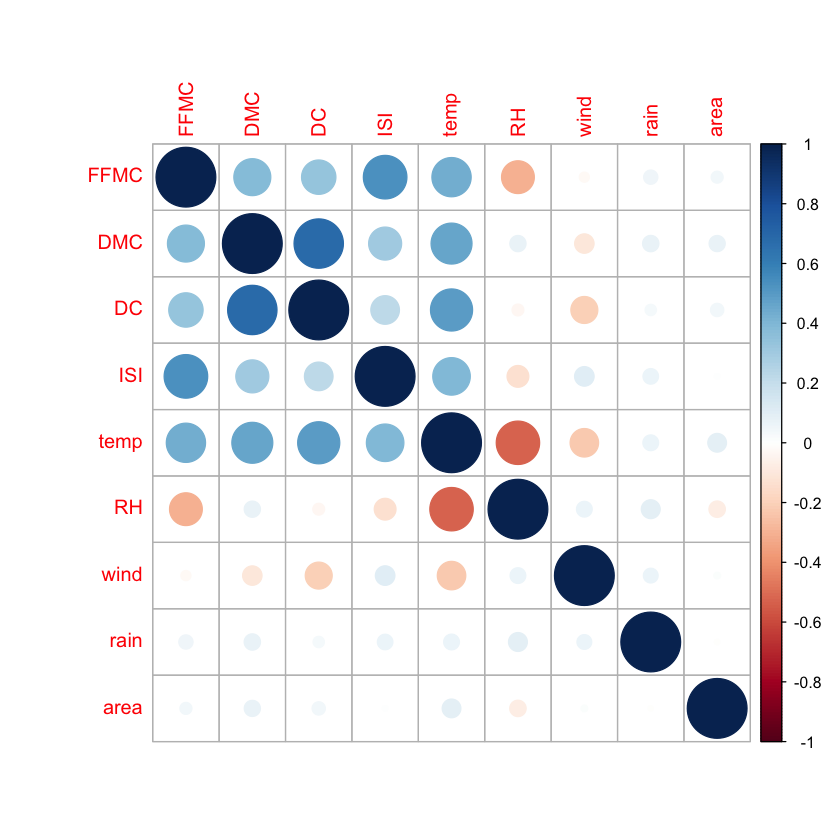

In [45]:
corrplot(correlation2)

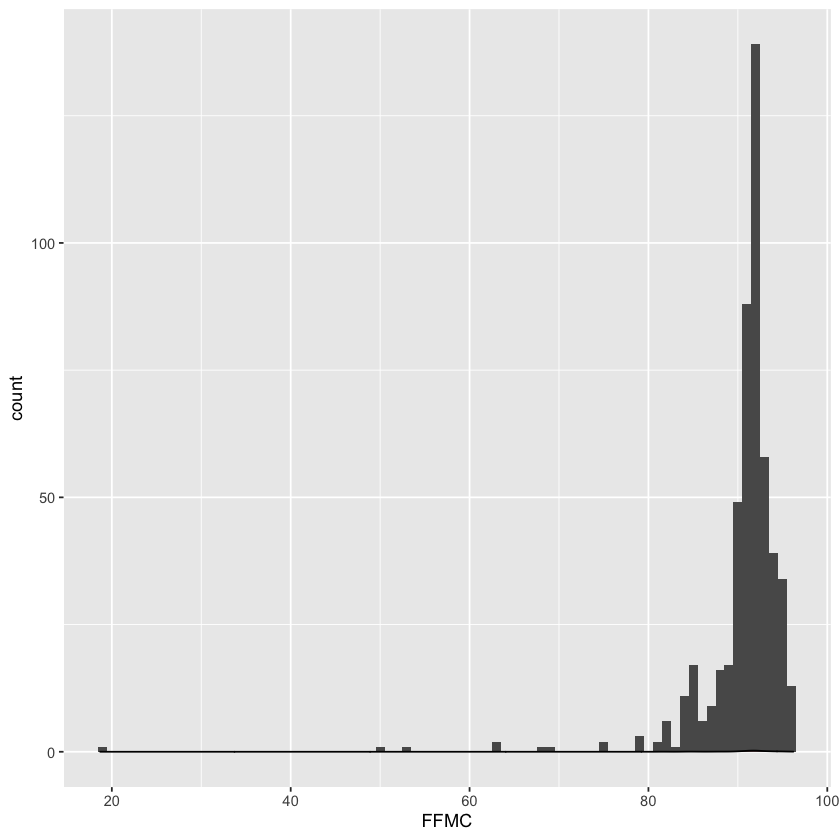

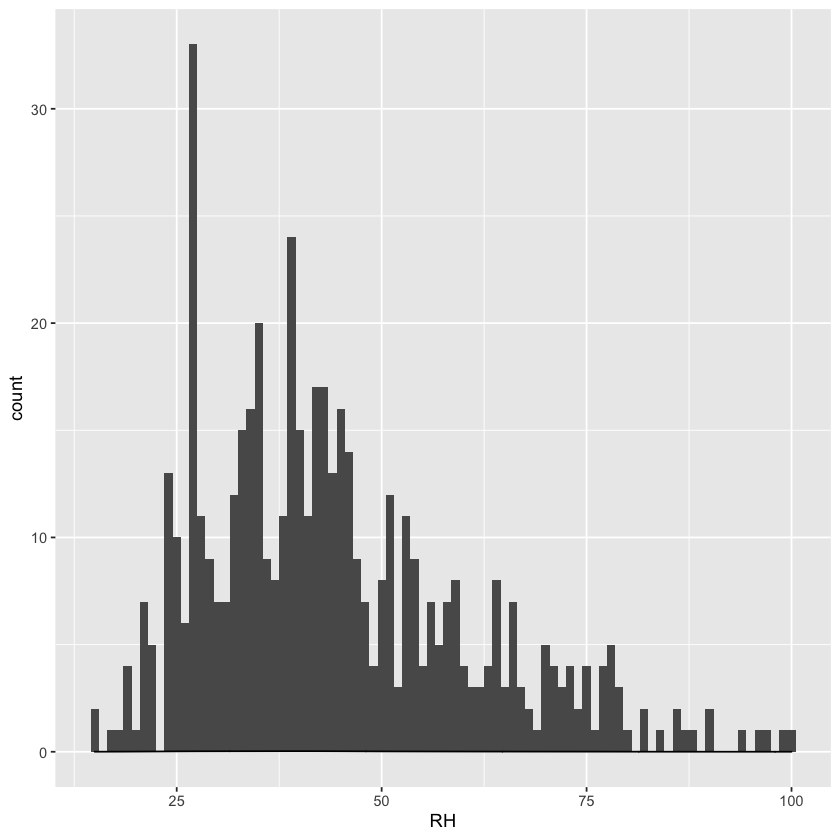

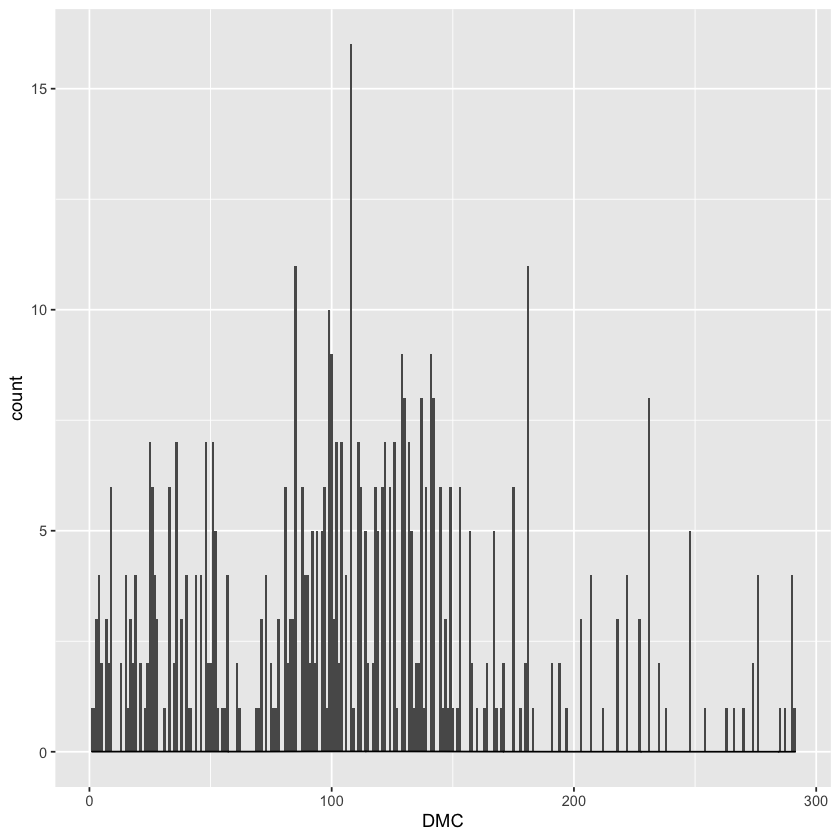

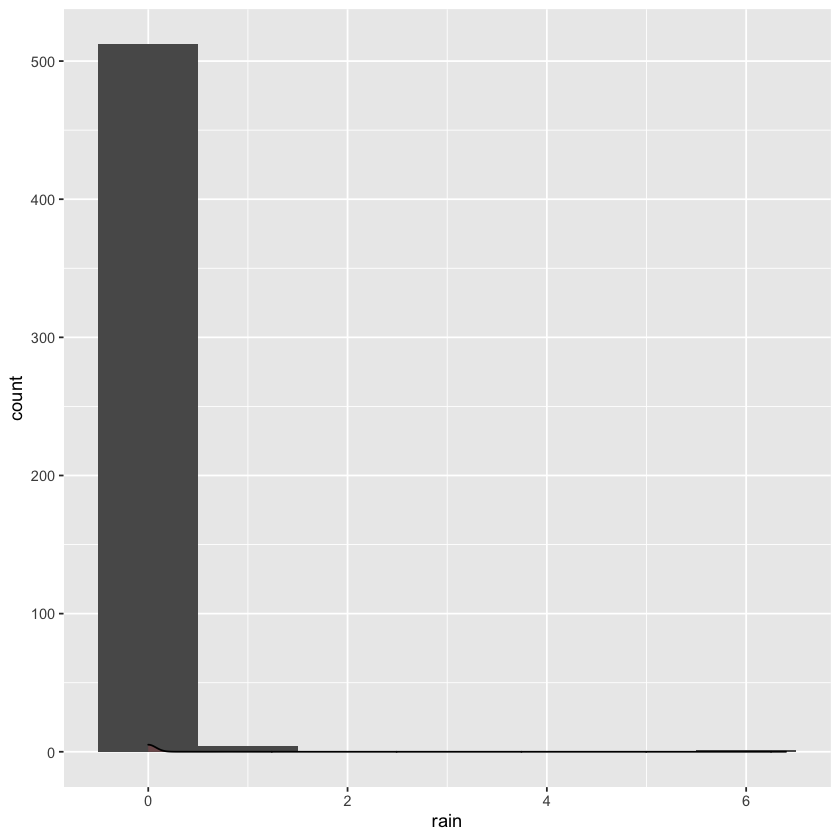

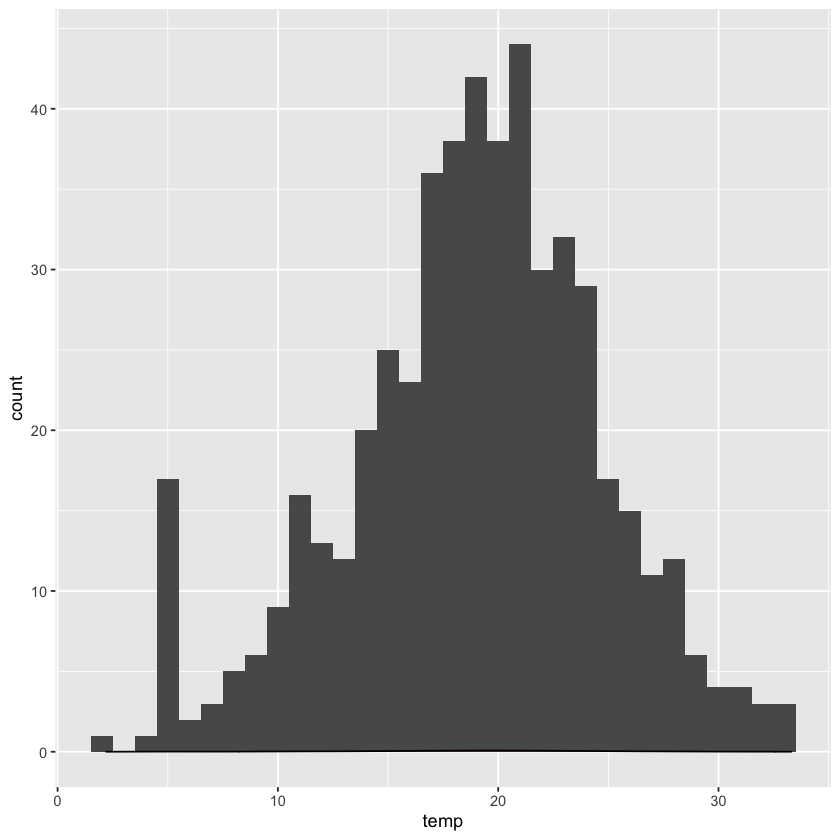

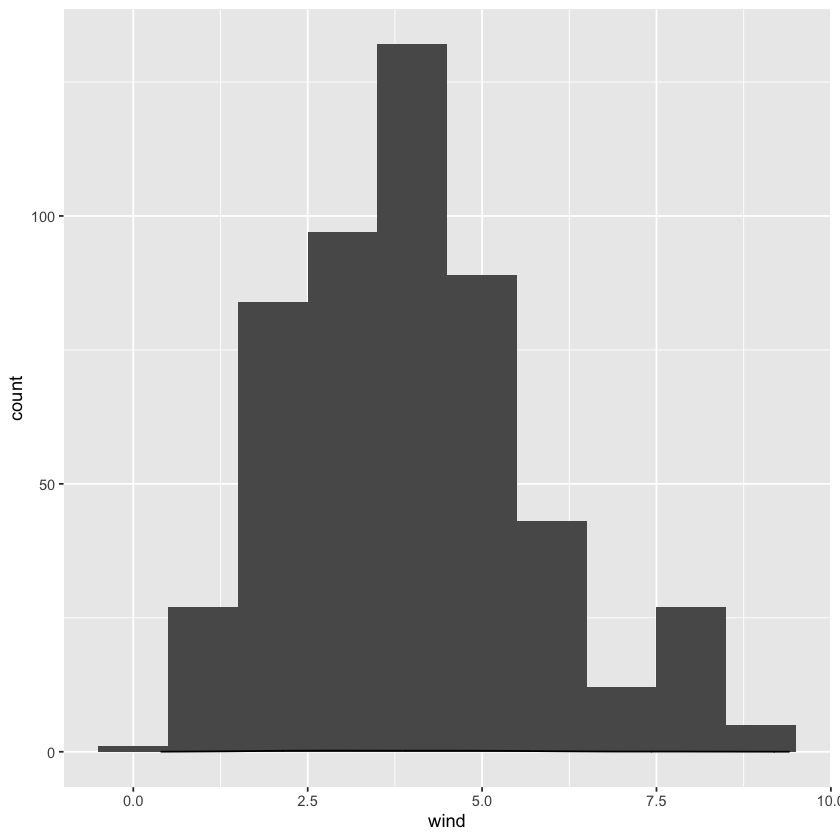

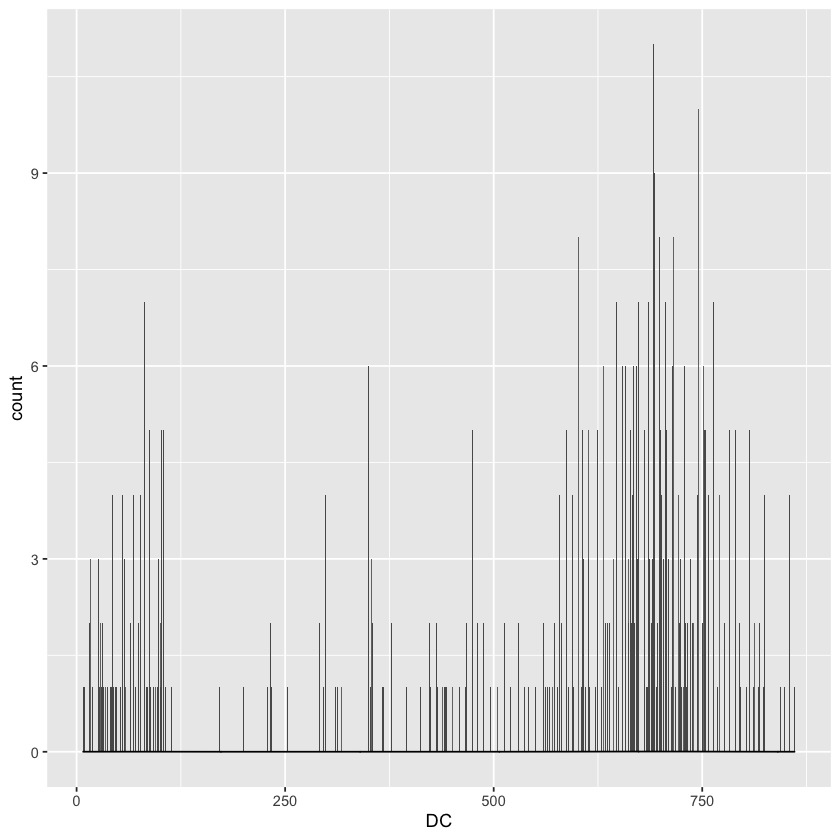

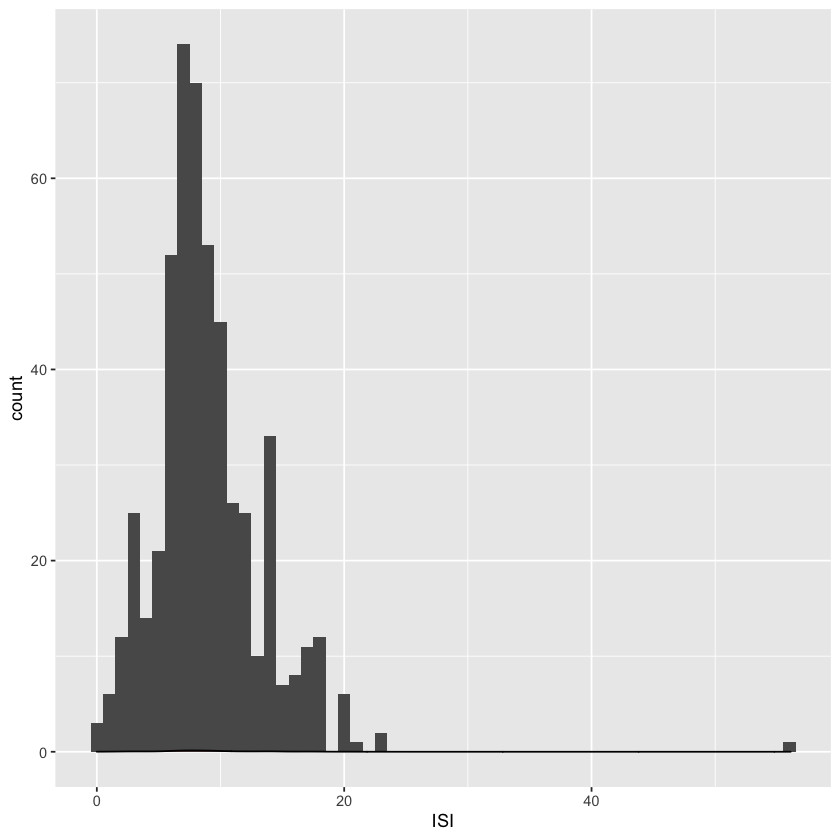

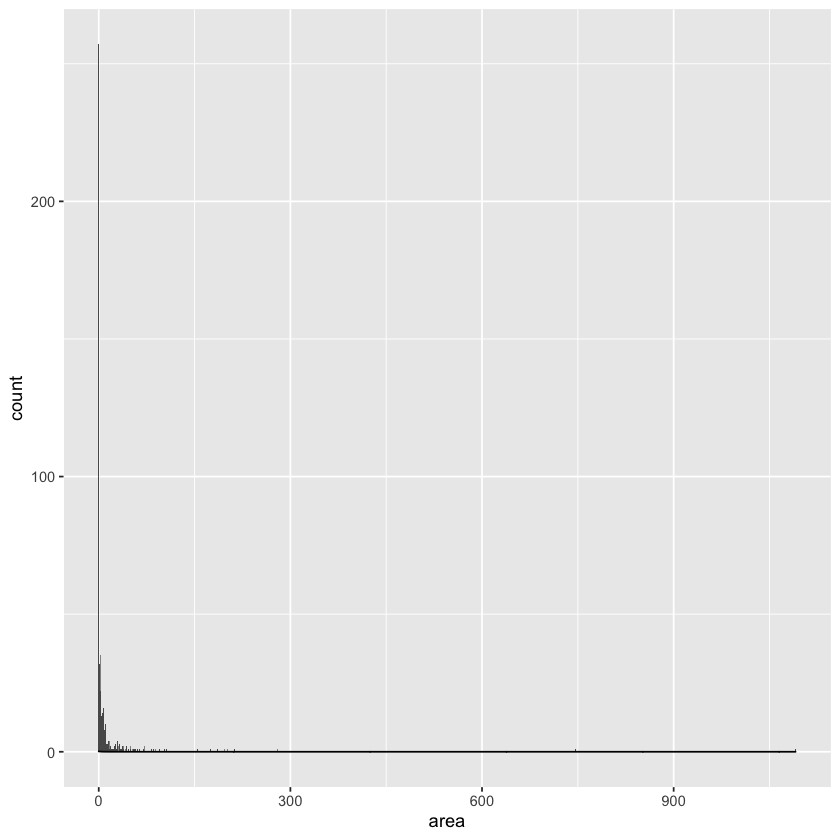

In [46]:
ggplot(forestfires_Data,aes(x=FFMC)) +
    geom_histogram(binwidth = 1) +
    geom_density(alpha=.2, fill="#FF6666")

ggplot(forestfires_Data,aes(x=RH)) +
    geom_histogram(binwidth = 1) +
    geom_density(alpha=.2, fill="#FF6666")

ggplot(forestfires_Data,aes(x=DMC)) +
    geom_histogram(binwidth = 1) +
    geom_density(alpha=.2, fill="#FF6666")

ggplot(forestfires_Data,aes(x=rain)) +
    geom_histogram(binwidth = 1) +
    geom_density(alpha=.2, fill="#FF6666")

ggplot(forestfires_Data,aes(x=temp)) +
    geom_histogram(binwidth = 1) +
    geom_density(alpha=.2, fill="#FF6666")

ggplot(forestfires_Data,aes(x=wind)) +
    geom_histogram(binwidth = 1) +
    geom_density(alpha=.2, fill="#FF6666")

ggplot(forestfires_Data,aes(x=DC)) +
    geom_histogram(binwidth = 1) +
    geom_density(alpha=.2, fill="#FF6666")

ggplot(forestfires_Data,aes(x=ISI)) +
    geom_histogram(binwidth = 1) +
    geom_density(alpha=.2, fill="#FF6666")

ggplot(forestfires_Data,aes(x=area)) +
    geom_histogram(binwidth = 1) +
    geom_density(alpha=.2, fill="#FF6666")




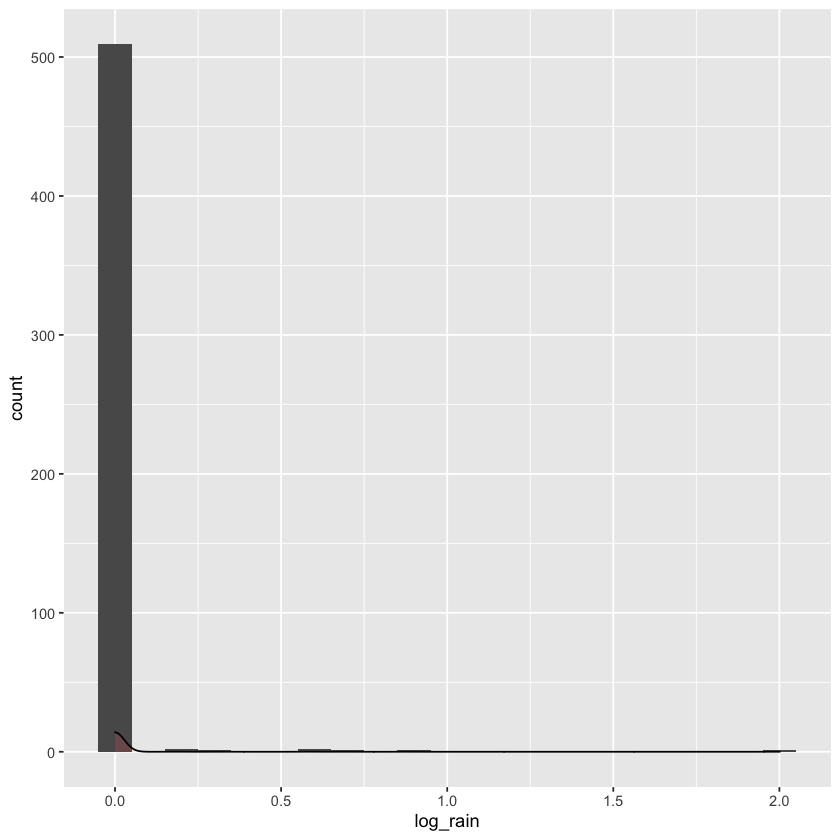

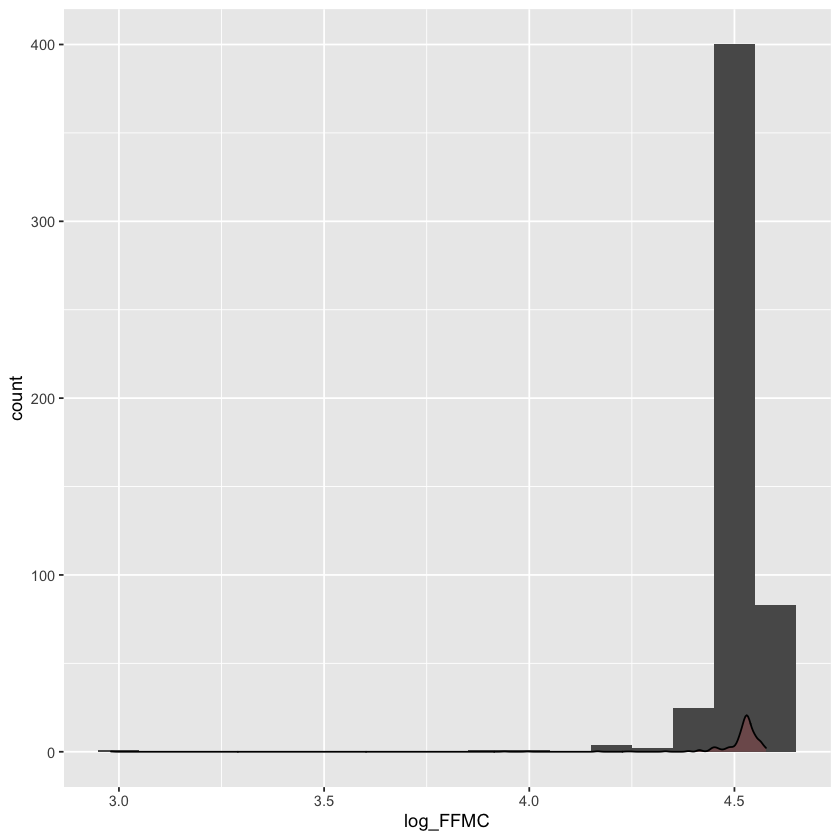

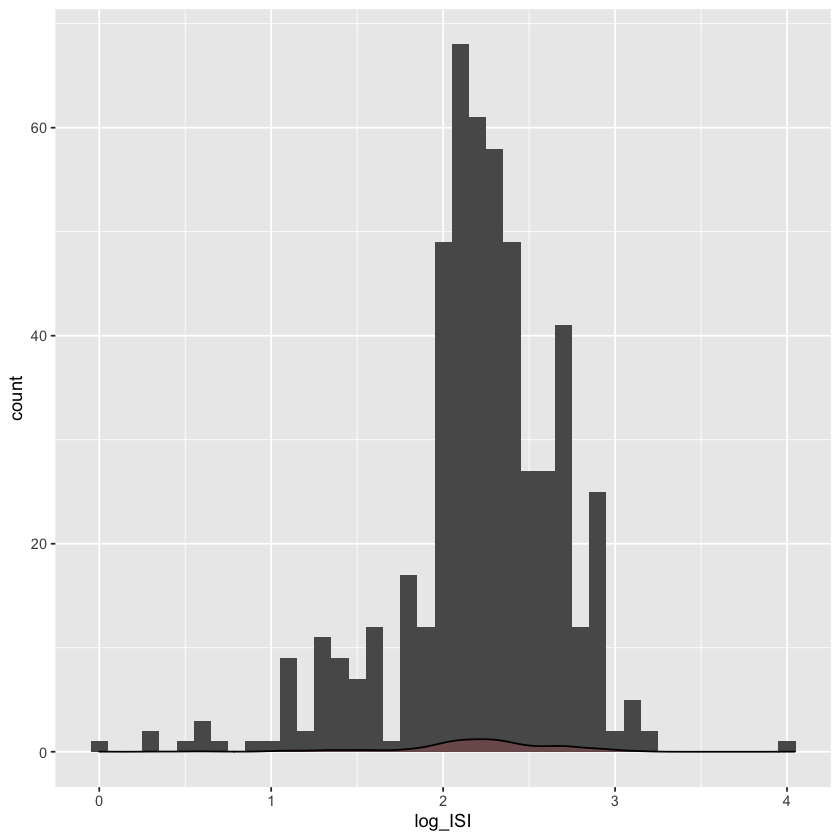

In [47]:
sub_data$log_rain <- log1p(sub_data$rain) # There seems to be nominal data
ggplot(sub_data,aes(x=log_rain)) +
    geom_histogram(binwidth = .1) +
    geom_density(alpha=.2, fill="#FF6666")

sub_data$log_FFMC <- log1p(sub_data$FFMC) # There seems to be an outlier
ggplot(sub_data,aes(x=log_FFMC)) +
    geom_histogram(binwidth = .1) +
    geom_density(alpha=.2, fill="#FF6666")

sub_data$log_ISI <- log1p(sub_data$ISI) #This seems to approx. normally distributed
ggplot(sub_data,aes(x=log_ISI)) +
    geom_histogram(binwidth = .1) +
    geom_density(alpha=.2, fill="#FF6666")



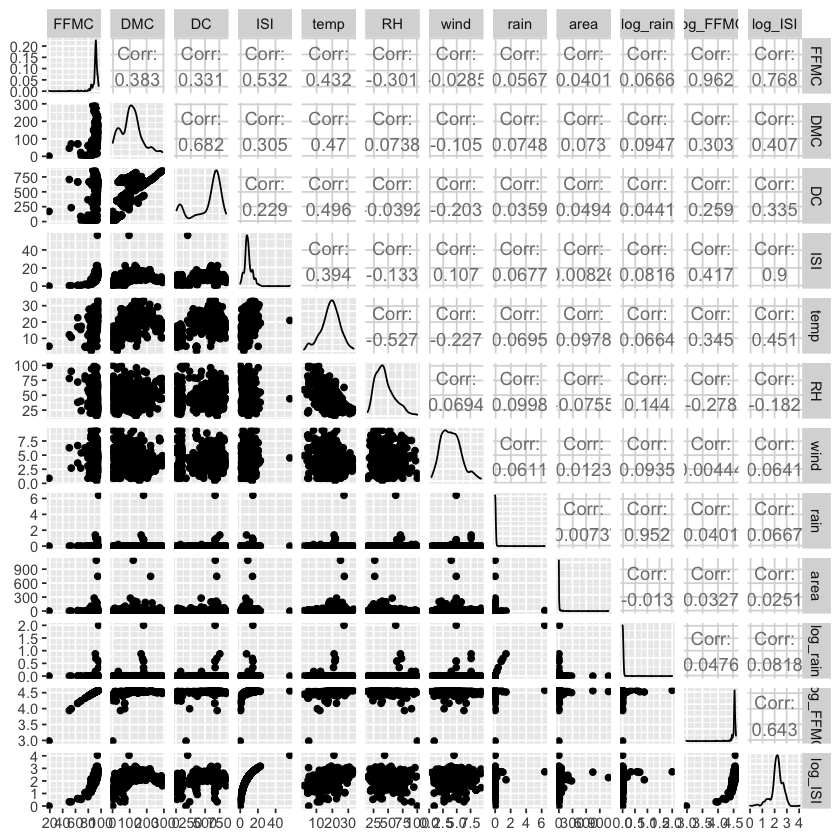

In [48]:
ggpairs(sub_data)

In [49]:
#TEST TRAIN SPLIT

length <- nrow(sub_data)

split_number <-  floor(.80 * length)

set.seed(137)
sampled_index <- sample(seq_len(length), size = split_number )
            
train <- sub_data[sampled_index,]
test <- sub_data[-sampled_index,]

In [50]:
sub_data1 <-  select(sub_data,-c(rain,FFMC,ISI))
#sub_data2 <-  select(sub_data, -c(log_rain,log_FFMC,log_ISI))

In [51]:
colSums(is.na(sub_data))

FFMC      DMC       DC      ISI     temp       RH     wind     rain 
       0        0        0        0        0        0        0        0 
    area log_rain log_FFMC  log_ISI 
       0        0        0        0

In [52]:
model.linear <- lm(sub_data1$area~., data=sub_data1)
summary(model.linear)


Call:
lm(formula = sub_data1$area ~ ., data = sub_data1)

Residuals:
    Min      1Q  Median      3Q     Max 
 -31.45  -15.34   -9.09   -1.11 1069.56 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -10.112630 188.900577  -0.054    0.957
DMC           0.078667   0.066530   1.182    0.238
DC           -0.004976   0.016254  -0.306    0.760
temp          0.810570   0.785101   1.032    0.302
RH           -0.197560   0.237196  -0.833    0.405
wind          1.482100   1.668447   0.888    0.375
log_rain    -10.294661  26.778295  -0.384    0.701
log_FFMC      4.159018  43.080851   0.097    0.923
log_ISI      -6.452316   8.468350  -0.762    0.446

Residual standard error: 63.65 on 508 degrees of freedom
Multiple R-squared:  0.0156,	Adjusted R-squared:  0.0001003 
F-statistic: 1.006 on 8 and 508 DF,  p-value: 0.43


## 3. Model Development<a class="anchor" id="sec_3"></a>

In [53]:
sub_data_hot <-  dummyVars("~.",data = forestfires_Data)

In [54]:
intermediate_data<- data.frame(predict(sub_data_hot,newdata=forestfires_Data))
intermediate_data

,X,Y,month.apr,month.aug,month.dec,month.feb,month.jan,month.jul,month.jun,month.mar,⋯,day.wed,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,5,0,0,0,0,0,0,0,1,⋯,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,0,0,0,0,0,0,0,0,⋯,0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,0,0,0,0,0,0,0,0,⋯,0,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,0,0,0,0,0,0,0,1,⋯,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,0,0,0,0,0,0,0,1,⋯,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,0,1,0,0,0,0,0,0,⋯,0,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0
7,8,6,0,1,0,0,0,0,0,0,⋯,0,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0
8,8,6,0,1,0,0,0,0,0,0,⋯,0,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0
9,8,6,0,0,0,0,0,0,0,0,⋯,0,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0


In [55]:
model.linear <- lm(forestfires_Data$area~., data=forestfires_Data)

summary(model.linear)


Call:
lm(formula = forestfires_Data$area ~ ., data = forestfires_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
 -55.32  -17.84   -6.82    4.99 1039.28 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -15.16402   76.56086  -0.198   0.8431  
X             2.25583    1.49786   1.506   0.1327  
Y            -0.14765    2.81881  -0.052   0.9582  
monthaug     46.88205   38.08792   1.231   0.2190  
monthdec     47.37821   36.94830   1.282   0.2004  
monthfeb      5.58985   25.94816   0.215   0.8295  
monthjan     14.76909   56.40617   0.262   0.7936  
monthjul     28.87889   33.05232   0.874   0.3827  
monthjun      6.71548   30.33765   0.221   0.8249  
monthmar     -4.22256   23.41447  -0.180   0.8570  
monthmay     12.79646   50.91572   0.251   0.8017  
monthnov     -4.41010   68.37767  -0.064   0.9486  
monthoct     68.97536   45.42009   1.519   0.1295  
monthsep     73.73192   42.67672   1.728   0.0847 .
daymon        5.96928   10.48154   0.57

In [56]:
df1 <- select(forestfires_Data, c(X,Y,area))
df2 <- aggregate(df1$area , by=list(df1$Y,df1$X),FUN=mean)
df2

Group.1,Group.2,x
<int>,<int>,<dbl>
2,1,11.5757895
3,1,15.7140000
4,1,10.0186667
5,1,28.8675000
2,2,18.5060000
3,2,0.0000000
4,2,5.3100000
5,2,4.6315000
3,3,6.5800000


In [57]:
library(reshape)
df3 <- cast(df2, Group.1 ~ Group.2, mean)
df3

Using x as value column.  Use the value argument to cast to override this choice



,Group.1,1,2,3,4,5,6,7,8,9
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,11.57579,18.5060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15.71400,0.0000,6.5800000,7.858182,NaN,7.711200,13.675000,8.77000,NaN
3,4,10.01867,5.3100,2.9383721,11.039722,3.206522,16.052222,10.541556,12.18000,46.4025
4,5,28.86750,4.6315,0.3114286,11.480400,0.000000,28.245918,7.035455,0.73250,4.0800
5,6,NaN,NaN,0.0000000,10.966250,4.405000,2.863333,43.225000,24.33269,42.8700
6,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.76000,NaN
7,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7450


In [58]:
class(df3)
df3[is.na(df3)] <- 0 # All the values that dont have mean will be NAN
df3

df4 <- add_row(df3,Group.1 = 1,"1" = 0, "2" = 0, "3"= 0, "4"=0,"5"=0,"6"=0,"7"=0,"8"=0,"9"=0, .before = 1)
df4 <- add_row(df4,Group.1 = 7,"1" = 0, "2" = 0, "3"= 0, "4"=0,"5"=0,"6"=0,"7"=0,"8"=0,"9"=0, .before = 6)
df4

[1] "cast_df"    "data.frame"

,Group.1,1,2,3,4,5,6,7,8,9
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,11.57579,18.5060,0.0000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
2,3,15.71400,0.0000,6.5800000,7.858182,0.000000,7.711200,13.675000,8.77000,0.0000
3,4,10.01867,5.3100,2.9383721,11.039722,3.206522,16.052222,10.541556,12.18000,46.4025
4,5,28.86750,4.6315,0.3114286,11.480400,0.000000,28.245918,7.035455,0.73250,4.0800
5,6,0.00000,0.0000,0.0000000,10.966250,4.405000,2.863333,43.225000,24.33269,42.8700
6,8,0.00000,0.0000,0.0000000,0.000000,0.000000,0.000000,0.000000,185.76000,0.0000
7,9,0.00000,0.0000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.7450


Group.1,1,2,3,4,5,6,7,8,9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00000,0.0000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
2,11.57579,18.5060,0.0000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
3,15.71400,0.0000,6.5800000,7.858182,0.000000,7.711200,13.675000,8.77000,0.0000
4,10.01867,5.3100,2.9383721,11.039722,3.206522,16.052222,10.541556,12.18000,46.4025
5,28.86750,4.6315,0.3114286,11.480400,0.000000,28.245918,7.035455,0.73250,4.0800
7,0.00000,0.0000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
6,0.00000,0.0000,0.0000000,10.966250,4.405000,2.863333,43.225000,24.33269,42.8700
8,0.00000,0.0000,0.0000000,0.000000,0.000000,0.000000,0.000000,185.76000,0.0000
9,0.00000,0.0000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.7450


In [59]:
df5 <- data.frame(df4)
df5 <- data.matrix(df5)


## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In [60]:
row.names(df4) <- df4$Group.1

In [61]:
df4$Group.1 <- NULL
df4

,1,2,3,4,5,6,7,8,9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00000,0.0000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
2,11.57579,18.5060,0.0000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
3,15.71400,0.0000,6.5800000,7.858182,0.000000,7.711200,13.675000,8.77000,0.0000
4,10.01867,5.3100,2.9383721,11.039722,3.206522,16.052222,10.541556,12.18000,46.4025
5,28.86750,4.6315,0.3114286,11.480400,0.000000,28.245918,7.035455,0.73250,4.0800
7,0.00000,0.0000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000
6,0.00000,0.0000,0.0000000,10.966250,4.405000,2.863333,43.225000,24.33269,42.8700
8,0.00000,0.0000,0.0000000,0.000000,0.000000,0.000000,0.000000,185.76000,0.0000
9,0.00000,0.0000,0.0000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.7450


## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

## 6. Conclusion <a class="anchor" id="sec_6"></a>

## 7. References <a class="anchor" id="sec_7"></a>